In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
plot.style.use('ggplot')

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# List files to find the correct one
!ls "/content/drive/MyDrive/Internship/Dataset .csv"

# Replace 'Dataset.csv' with the exact name from the output above
df = pd.read_csv('/content/drive/MyDrive/Internship/Dataset .csv')

# Preview the data
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'/content/drive/MyDrive/Internship/Dataset .csv'


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
# Step 1: Process Cuisines Data
cuisine_counts = (
    df['Cuisines']
    .dropna()  # Remove missing values
    .str.split(',')  # Split multiple cuisines
    .explode()  # Expand into separate rows
    .str.strip()  # Remove extra spaces
    .value_counts()  # Count occurrences
)

# Step 2: Select Top 3 Cuisines
top_cuisines = cuisine_counts.head(3).reset_index()
top_cuisines.columns = ['Cuisine', 'Restaurant Count']
# See as a dataframe
top_cuisines



,Cuisine,Restaurant Count
0,North Indian,3960
1,Chinese,2735
2,Fast Food,1986


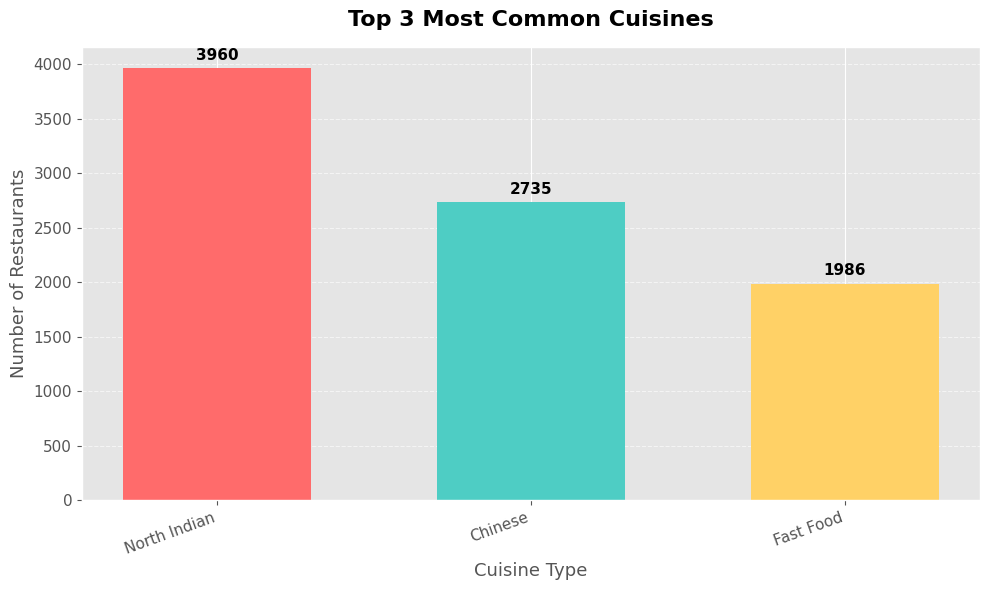

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Example top cuisines data (replace with your real data)
top_cuisines = pd.DataFrame({
    'Cuisine': ['North Indian', 'Chinese', 'Fast Food'],
    'Restaurant Count': [3960, 2735, 1986]
})

# Plot settings
plt.figure(figsize=(10, 6))
color_palette = ['#FF6B6B', '#4ECDC4', '#FFD166']

bars = plt.bar(top_cuisines['Cuisine'], top_cuisines['Restaurant Count'], color=color_palette, width=0.6)

# Titles and labels
plt.title('Top 3 Most Common Cuisines', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Cuisine Type', fontsize=13)
plt.ylabel('Number of Restaurants', fontsize=13)
plt.xticks(rotation=20, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, f'{int(height)}',
             ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')

# Reduce white space and improve layout
plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter
import pandas as pd

# Assuming the DataFrame is already loaded as `df`

# Step 1: Drop missing values in the 'Cuisines' column
cuisine_series = df['Cuisines'].dropna()

# Step 2: Split cuisine strings, strip whitespace, and count occurrences
all_cuisines = [cuisine.strip() for cuisines in cuisine_series for cuisine in cuisines.split(',')]
cuisine_counts = Counter(all_cuisines)

# Step 3: Get the top 3 most common cuisines
top_cuisines = cuisine_counts.most_common(3)

# Step 4: Calculate the percentage of restaurants serving each top cuisine
total_restaurants = len(df)
top_cuisine_percentages = {
    cuisine: round((df['Cuisines'].str.contains(cuisine, na=False).sum() / total_restaurants) * 100, 2)
    for cuisine, _ in top_cuisines
}

# Step 5: Convert to DataFrame for better visualization or plotting (optional)
top_cuisines_df = pd.DataFrame(top_cuisines, columns=['Cuisine', 'Count'])
top_cuisines_df['Percentage (%)'] = top_cuisines_df['Cuisine'].map(top_cuisine_percentages)

# Step 6: Display results
print(top_cuisines_df)


        Cuisine  Count  Percentage (%)
0  North Indian   3960           41.46
1       Chinese   2735           28.61
2     Fast Food   1986           20.80


Q2. Calculate the percentage of restaurants that serve each of the top cuisines.


In [ ]:
# Step 1: Calculate total number of restaurants
total_restaurants = len(df)

# Step 2: Calculate percentage of restaurants for each top cuisine
# Make sure 'Restaurant Count' column exists in top_cuisines DataFrame
# Convert the list of tuples to a DataFrame
top_cuisines_df = pd.DataFrame(top_cuisines, columns=['Cuisine', 'Restaurant Count'])

top_cuisines_df['Percentage'] = (top_cuisines_df['Restaurant Count'] / total_restaurants * 100).round(2)

# Display the result
print(top_cuisines_df)

        Cuisine  Restaurant Count  Percentage
0  North Indian              3960       41.46
1       Chinese              2735       28.64
2     Fast Food              1986       20.79


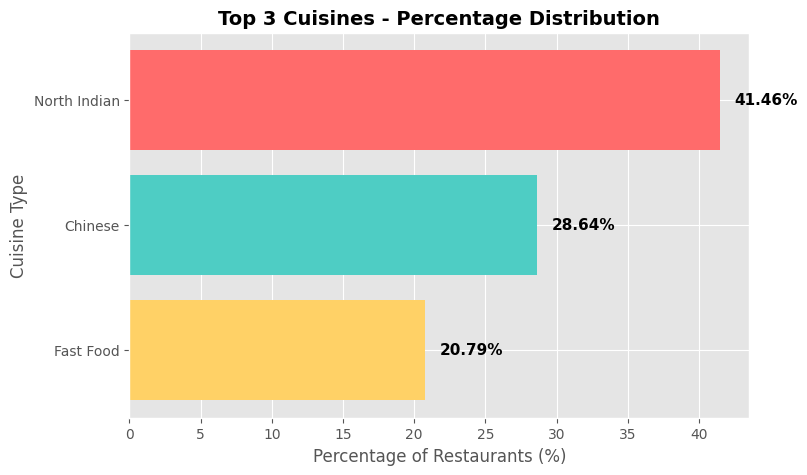

In [ ]:
# Step 2: Horizontal Bar Chart for Percentage
plt.figure(figsize=(8, 5))
colors = ['#FF6B6B', '#4ECDC4', '#FFD166']  # Pastel color theme

plt.barh(top_cuisines_df['Cuisine'], top_cuisines_df['Percentage'], color=colors)
plt.xlabel("Percentage of Restaurants (%)", fontsize=12)
plt.ylabel("Cuisine Type", fontsize=12)
plt.title("Top 3 Cuisines - Percentage Distribution", fontsize=14, fontweight='bold')

# Add percentage values on bars
for i, pct in enumerate(top_cuisines_df['Percentage']):
    plt.text(pct + 1, i, f"{pct}%", va='center', fontsize=11, fontweight='bold')

plt.gca().invert_yaxis()  # Invert y-axis to keep the highest percentage at the top
plt.show()

Task 2 : Task: City Analysis

Q1. Identify the city with the highest numberof restaurants in the dataset.

In [ ]:
# Find the city with the highest number of restaurants
city_counts = df['City'].value_counts()
top_city = city_counts.idxmax()  # City with the highest number of restaurants
top_city_count = city_counts.max()  # Number of restaurants in that city

# Print the result
print(f"The city with the most restaurants is \033[1m{top_city} ({top_city_count} restaurants)\033[0m.")

The city with the most restaurants is New Delhi (5473 restaurants).


Q2. Calculate the average rating for restaurants in each city.

In [ ]:
city_avg_ratings = df.groupby('City')['Aggregate rating'].mean().round(2).head()

city_avg_ratings

,Aggregate rating
City,
Abu Dhabi,4.30
Agra,3.96
Ahmedabad,4.16
Albany,3.56
Allahabad,3.40


Q3. Determine the city with the highest average rating.

In [ ]:
top_rated_city = city_avg_ratings.idxmax()
top_avg_rating = city_avg_ratings.max()
print(f"The city with the highest average rating is \033[1m{top_rated_city} ({top_avg_rating} average rating)\033[0m.")

The city with the highest average rating is Abu Dhabi (4.3 average rating).


Task 3: Price Range Distribution


Q1. Create a histogram or bar chart tovisualize the distribution of price ranges among the restaurants.

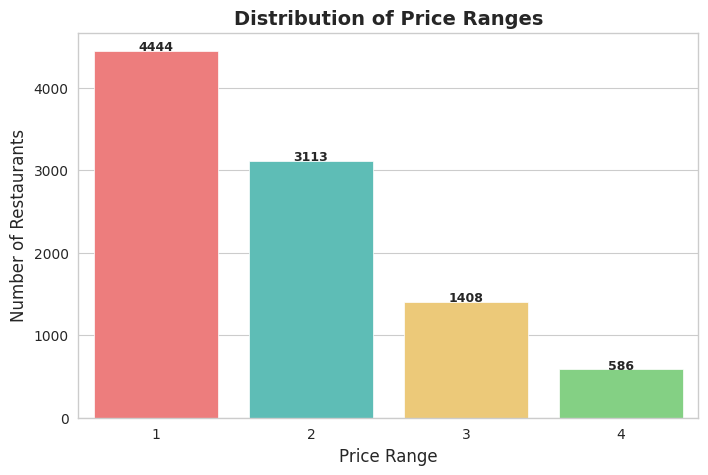

In [ ]:
# Step 1: Count the number of restaurants in each price range
price_range_counts = df['Price range'].value_counts().sort_index()

# Set a visually appealing style
sns.set_style("whitegrid")

# Define color palette
colors = ['#FF6B6B', '#4ECDC4', '#FFD166','#77DD77']  # Pastel colors

# Create the bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=price_range_counts.index, y=price_range_counts.values, hue=price_range_counts.index, palette=colors, legend=False)

# Add labels and title
plt.xlabel("Price Range", fontsize=12)
plt.ylabel("Number of Restaurants", fontsize=12)
plt.title("Distribution of Price Ranges", fontsize=14, fontweight='bold')

# Show values on top of bars
for i, val in enumerate(price_range_counts.values):
    plt.text(i, val + 5, str(val), ha='center', fontsize=9, fontweight='bold')

plt.show()


In [ ]:
# Step 1: Calculate the percentage of restaurants in each price range
total_restaurants = len(df)
price_range_percentages = (price_range_counts / total_restaurants * 100).round(2)

# Display the results
print("Percentage of Restaurants in Each Price Range:\n")
for price, percent in price_range_percentages.items():
    print(f"Price Range {price}: {percent}%")

Percentage of Restaurants in Each Price Range:

Price Range 1: 46.53%
Price Range 2: 32.59%
Price Range 3: 14.74%
Price Range 4: 6.14%


Percentage of Restaurants in Each Price Range:

Price Range 1: 46.53%
Price Range 2: 32.59%
Price Range 3: 14.74%
Price Range 4: 6.14%


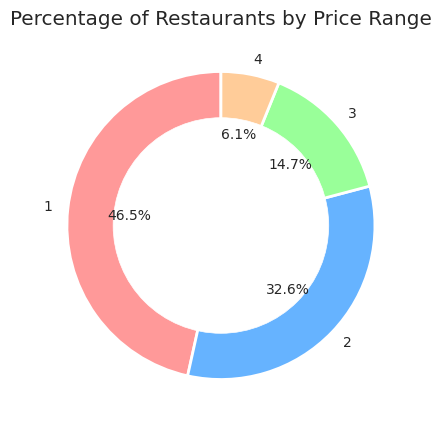

In [ ]:
# Step 2: Display the results
print("Percentage of Restaurants in Each Price Range:\n")
for price, percent in price_range_percentages.items():
    print(f"Price Range {price}: {percent}%")

# Step 3: Create Donut Chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(5,5))
plt.pie(price_range_percentages, labels=price_range_percentages.index, autopct='%1.1f%%',
        colors=colors, startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 2, 'antialiased': True})

# Add center circle to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Title
plt.title('Percentage of Restaurants by Price Range')

# Show plot
plt.show()

Task 4: Online Delivery




Q1. Determine the percentage of restaurants that offer online delivery.

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
# Convert 'Has Online delivery' column to lowercase for consistency
df['Has Online delivery'] = df['Has Online delivery'].str.lower()

# Step 1: Calculate percentage of restaurants offering online delivery
total_restaurants = len(df)
online_delivery_count = (df['Has Online delivery'] == 'yes').sum()
online_delivery_percentage = (online_delivery_count / total_restaurants) * 100

# Step 2: Print results
print(f"📌 Percentage of restaurants offering online delivery: {online_delivery_percentage:.2f}%")

📌 Percentage of restaurants offering online delivery: 25.66%


Q2. Compare the average ratings of restaurants with and without online delivery.

In [ ]:
# Step 1: Compare average ratings (assuming 'Aggregate rating' column exists)
if 'Aggregate rating' in df.columns:
    avg_rating_with_delivery = df[df['Has Online delivery'] == 'yes']['Aggregate rating'].mean()
    avg_rating_without_delivery = df[df['Has Online delivery'] == 'no']['Aggregate rating'].mean()
else:
    avg_rating_with_delivery = avg_rating_without_delivery = "Rating column not found"

# Step 2: Print result
print(f"⭐ Average rating of restaurants with online delivery: {avg_rating_with_delivery.round(2)}")
print(f"⭐ Average rating of restaurants without online delivery: {avg_rating_without_delivery.round(2)}")

⭐ Average rating of restaurants with online delivery: 3.25
⭐ Average rating of restaurants without online delivery: 2.47




```
# This is formatted as code
```

# New Section